In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import arviz as az # trabajar bayesian y stats
import pymc3 as pm #paquete Jags
import pandas as pd

# Uso de la función de verosimilitud Binomial con una distribución previa Beta

Variables dicotómicas (valores 1,0 o Si-No). Lanzamientos de una moneda, compro o no compro, llueve o no ...

## Función de probabilidad de Bernouilli

$P(Y = y | \theta)= \theta^{y}(1- \theta)^{1-y}$

Donde $\theta$ es la probabilidad de la variable interés, y suele puede tener un valor entre [0,1], decimos que su espacio paramétrico.

$\Theta [0,1]$.

$E(Y)= \theta$

$Var (Y)= \theta (1- \theta)$

## Prèvia conjugada

Una distribución se dice conjugada si la distribución "posterior" tiene la misma forma que la "prior". en este caso, nuestra creencia produciría una distribución  "a priori" Beta, igual que la "posterior".

$(\theta |a,b) \sim beta(a,b)$

Beta Distribution

$p(\theta | a,b) = beta (\theta|a,b)$\
              $ = \frac{\theta^{a-1}(1- \theta)^{b-1}}{B(a,b)}$\
              
Siendo $B(a,b) =\int_0^1 \theta^{a-1}(1- \theta)^{b-1} d\theta$\

## En R

$beta (\theta|a,b)$ es la función $dbeta(\theta, a, b)$\

$B(a,b) = \int_0^1 \theta^{a-1}(1- \theta)^{b-1} d\theta$ es la función beta(a,b).\

Vamos a ver cómo se comporta la función dbeta en función de los parámetros a,b.\
Recordemos que los parámetros a y b corresponden a la distribución previa según la información o creencia que disponemos.\
Vamos a suponer que tenemos información de una liga de baloncesto de un país que apenas tenemos información. Nos indican que el porcentaje de acierto de tiros libres es de un 75% (0.75). Entendemos que hay un margen de (0.15) de error.

Hacemos una representación de las formas que tiene una distribución Beta en función de sus valores (a,b):

Text(0.07, 0.5, 'p(θ)')

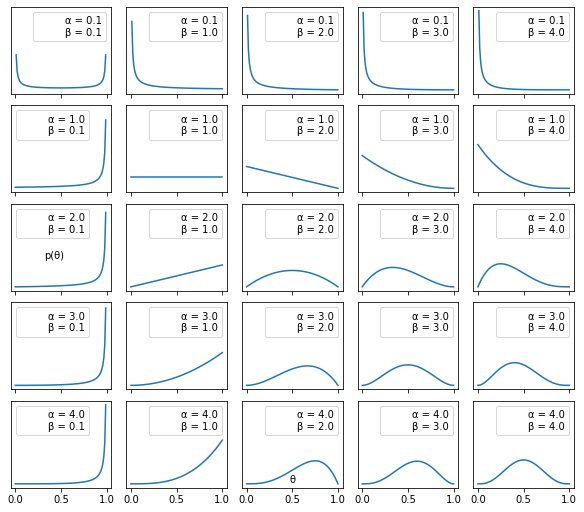

In [8]:

params = [0.1, 1, 2, 3, 4]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, 
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(5):
    for j in range(5):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, 
                     b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

Fijémonos en la diagonal como se aproxima a una distribución normal(no puede ser normal ya que está acotada entre 0 y 1) a medida que aumentan los valores a,b proporcionalmente reduciendo su varianza.

$\mu = a (a+b)$ la media.\

$\omega=(a-1)/(a+b-2)$ la moda.\

Pero lo interesante es averiguar las relaciones entre a,b sabiendo la media y varianza, que es lo que se suele conocer.

$a=\mu \left(\frac{\mu(1-\mu)} {\sigma ^2}-1\right)$\

$b=(1-\mu)\left(\frac{\mu(1-\mu)}{\sigma ^2}-1 \right)$\

Bien, ahora ya sabemos calcular tanto media y varianza, sabiendo a,b y al revés.\

# Ejemplo

Siguiendo con nuestro ejemplo, estamos haciendo un seguimiento de equipos de un país que apenas conocemos y nuestra creencia es que tienen un % de acierto de 0.75 con una desvicación media de 0.15.

Varianza = a * b / {[(a + b)^2]*(a+b+1)}

media = a/c

y tenemos que:

c = media (1 - media) / sigma2 - 1
a = meida * c
b = (1 - media) * c


In [30]:
np.random.seed(123)
trials = 25 # En el ejemplo en R, a= 5.5, b= 1.83 
theta_real = 0.75 # unknown value in a real experiment
data = np.array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]) # observaciones 20/25 anotados

In [31]:
data

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

## Likelihood

Vamos a ver en directo un partido de un equipo de esa liga en cuestión. Vamos a recoger nuestra observación de ese partido para poder evaluar, juntamente con nuestra creencia, una distribución "posterior".

Recordemos que la función es:

$P(Y = y | \theta)= \theta^{y}(1- \theta)^{1-y}$

Cuando $\theta$ debe tomar valores entre 0,1, o sea, que será el rango.
Vamos a generar un ramdom con estas condiciones:

Random con distribución Binomial Pongamos por caso que ahora hacemos una observación y resulta que la estadística mejora, en 25 lanzamientos, anota 20. Donde N = 25 y a = 20

In [32]:
a = 5.5
b = 1.833

with pm.Model() as model:
    θ = pm.Beta('θ', alpha=a, beta=b) #prior
    y = pm.Bernoulli('y', p=θ, observed=data) # Likelihood
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 2023.34it/s]


Hemos lanzado el modelo, con nuestra prior y linkelihood.
Explicación:

1- linea Definimos el modelo como "model"

2- Definimos nuestra función "prior", que en nuestro caso Beta con a,b parámetros.

3- Definimos nuestra función de Verosimilitud, con los datos Binomial, requiere parámetros, "theta" nuestra media % TL encestados como variable estudiada, con los datos observados.

El modelo lanza una simulación para nuestra posterior con 2 cadenas de 1500 datos cada uno.

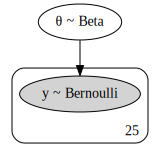

In [33]:
pm.model_to_graphviz(model) # mostramos la estructura

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d0d58f048>,
      dtype=object)

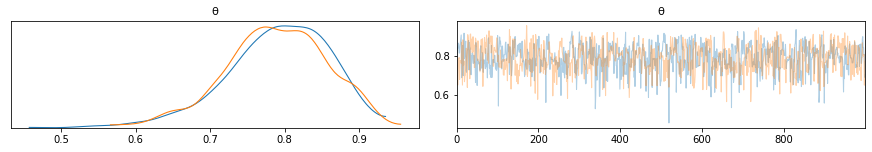

In [34]:
#dibujamos la posterior
az.plot_trace(trace)

In [35]:
# El valor en R ha sido del 0.7886598
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.789,0.068,0.661,0.911,0.002,0.002,883.0,838.0,830.0,1501.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d10fbc860>],
      dtype=object)

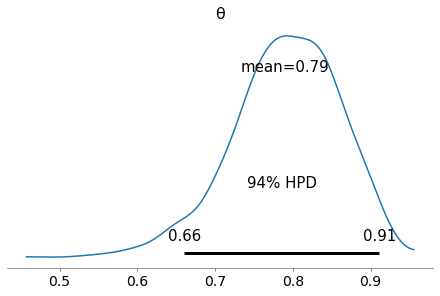

In [36]:
#Dibujamos la posterior
az.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfb3b69e8>],
      dtype=object)

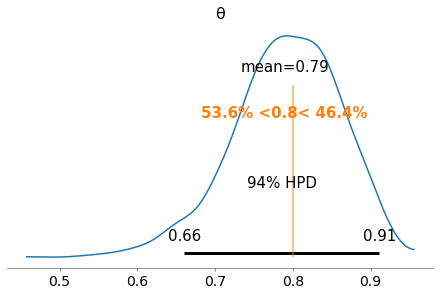

In [37]:
#Qué probabilidad hay que la distribución de la media esté por encima de 0.8 (80% acierto) El valor en R ha sido del 0.7886598
az.plot_posterior(trace, ref_val=0.8) 

# Qué pasaría si tuviéramos mayor confianza en los datos? -> menos varianza en nuestra creencia.

En un principio pensábamos que teníamos una creencia de mu 0.75 y sigma 0.15. Según nuestros estudios actualizados, reducimos esta varianza al 0.05. Con los mismos datos, ¿Cómo quedarían las curvas?

In [39]:
# Para una media 0.75 y varianza 0.15 los valores a,b son:
a = 55.5
b = 18.5

with pm.Model() as model:
    θ = pm.Beta('θ', alpha=a, beta=b) #prior
    y = pm.Bernoulli('y', p=θ, observed=data) # Likelihood
    trace1 = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 1938.66it/s]
The acceptance probability does not match the target. It is 0.8840860288455589, but should be close to 0.8. Try to increase the number of tuning steps.


In [41]:
az.summary(trace1)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.763,0.043,0.684,0.841,0.001,0.001,990.0,974.0,971.0,1461.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cfbf76cf8>],
      dtype=object)

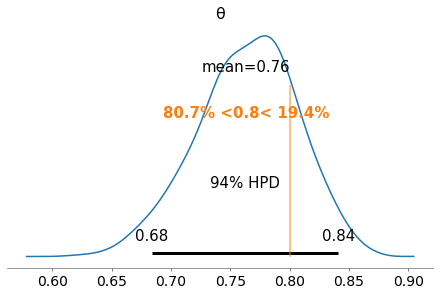

In [42]:
#Qué probabilidad hay que la distribución de la media esté por encima de 0.8 (80% acierto) El valor en R ha sido del 0.1933488
az.plot_posterior(trace, ref_val=0.8) 